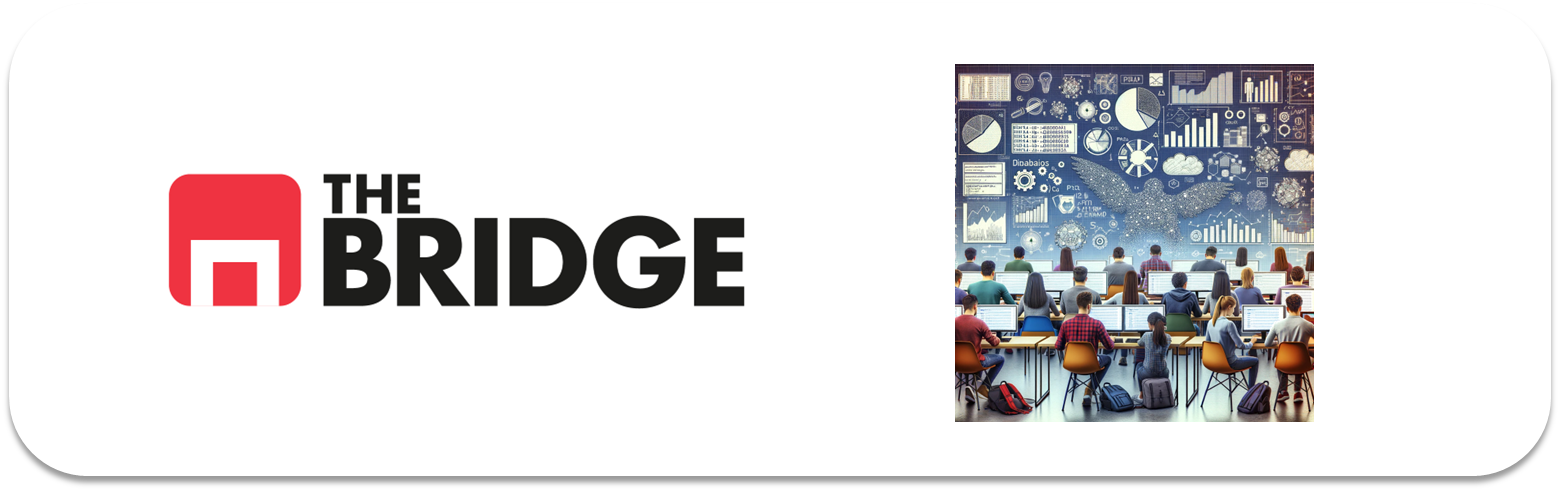

## PRACTICA OBLIGATORIA: **Estadistica Inferencial y Probabilidad**

* La práctica obligatoria de esta unidad consiste en un único ejercicio de construcción de gráficas. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [ ]:
import pandas as pd  
from statsmodels.stats.proportion import proportion_confint

## #1 Titanic

Carga el dataset del titanic, y contesta a las siguientes preguntas:

1. ¿Cuál es la probabilidad de superviviencia de un niño?
2. ¿Cuál es la probabilidad de que una mujer viajase sola?
3. ¿Cuál es la probabilidad de sobreviviese un hombre entre 30 y 40 años que embarcó en Southampton y no tuvo que pagar billete?
4. ¿Y si hubiera acompañado de 2 familiares?
5. Si consideramos ahora que queremos tener cierta confianza estadística en nuestras probabilidades (ten en cuenta que estamos extrapolando los ratios de una muestra), cuál sería el rango de probabilidades de sobrevivir de una persona que viajase sola al 95%
6. EXTRA: Y si además el pasajero de 5 fuera un pasajero de tercera o de segunda.

In [7]:
file_path = r'C:\Users\Jesus\Documents\DS_Online_Octubre24_Exercises\DS_Online_Octubre24_Exercises\04_Machine_Learning\Sprint_09\Unidad_01\Practica_Obligatoria\data\titanic.csv'

titanic_data = pd.read_csv(file_path)

# 1. Probabilidad de supervivencia de un niño (menor de 18 años)
children = titanic_data[titanic_data['age'] < 18]
prob_survival_children = children['alive'].value_counts(normalize=True).get('yes', 0)

# 2. Probabilidad de que una mujer viajase sola (alone == True)
women_alone = titanic_data[(titanic_data['sex'] == 'female') & (titanic_data['alone'] == True)]
prob_women_alone = women_alone.shape[0] / titanic_data[titanic_data['sex'] == 'female'].shape[0]

# 3. Probabilidad de sobrevivir de un hombre entre 30 y 40 años que embarcó en Southampton y no pagó billete
men_30_40_southampton = titanic_data[
    (titanic_data['sex'] == 'male') &
    (titanic_data['age'] >= 30) & (titanic_data['age'] <= 40) &
    (titanic_data['embark_town'] == 'Southampton') &
    (titanic_data['fare'] == 0)
]
prob_survival_men_30_40_southampton = men_30_40_southampton['alive'].value_counts(normalize=True).get('yes', 0)

# 4. Probabilidad de que sobreviviese alguien acompañado de 2 familiares
with_2_family = titanic_data[(titanic_data['sibsp'] + titanic_data['parch']) == 2]
prob_survival_with_2_family = with_2_family['alive'].value_counts(normalize=True).get('yes', 0)

# 5. Rango de probabilidad de supervivencia de una persona que viaja sola al 95% de confianza
alone = titanic_data[titanic_data['alone'] == True]
n_alone = alone.shape[0]
n_survived_alone = alone['alive'].value_counts().get('yes', 0)
lower_bound, upper_bound = proportion_confint(n_survived_alone, n_alone, alpha=0.05, method='normal')

# 6. Probabilidad de supervivencia de un pasajero solo y de tercera o segunda clase
alone_2nd_3rd = alone[alone['class'].isin(['Second', 'Third'])]
n_2nd_3rd = alone_2nd_3rd.shape[0]
n_survived_2nd_3rd = alone_2nd_3rd['alive'].value_counts().get('yes', 0)
prob_survival_2nd_3rd = n_survived_2nd_3rd / n_2nd_3rd if n_2nd_3rd > 0 else 0

results = {
    "Probabilidad de supervivencia de un niño": prob_survival_children,
    "Probabilidad de que una mujer viajase sola": prob_women_alone,
    "Probabilidad de supervivencia de un hombre entre 30 y 40 años en Southampton que no pagó billete": prob_survival_men_30_40_southampton,
    "Probabilidad de supervivencia si viaja con 2 familiares": prob_survival_with_2_family,
    "Rango de probabilidad de supervivencia al 95% de confianza": (lower_bound, upper_bound),
    "Probabilidad de supervivencia de un pasajero solo y de 2ª o 3ª clase": prob_survival_2nd_3rd
}

for key, value in results.items():
    print(f"{key}: {value}")


Probabilidad de supervivencia de un niño: 0.5398230088495575
Probabilidad de que una mujer viajase sola: 0.4012738853503185
Probabilidad de supervivencia de un hombre entre 30 y 40 años en Southampton que no pagó billete: 0
Probabilidad de supervivencia si viaja con 2 familiares: 0.5784313725490197
Rango de probabilidad de supervivencia al 95% de confianza: (0.2646501161535406, 0.3424262339395693)
Probabilidad de supervivencia de un pasajero solo y de 2ª o 3ª clase: 0.24532710280373832


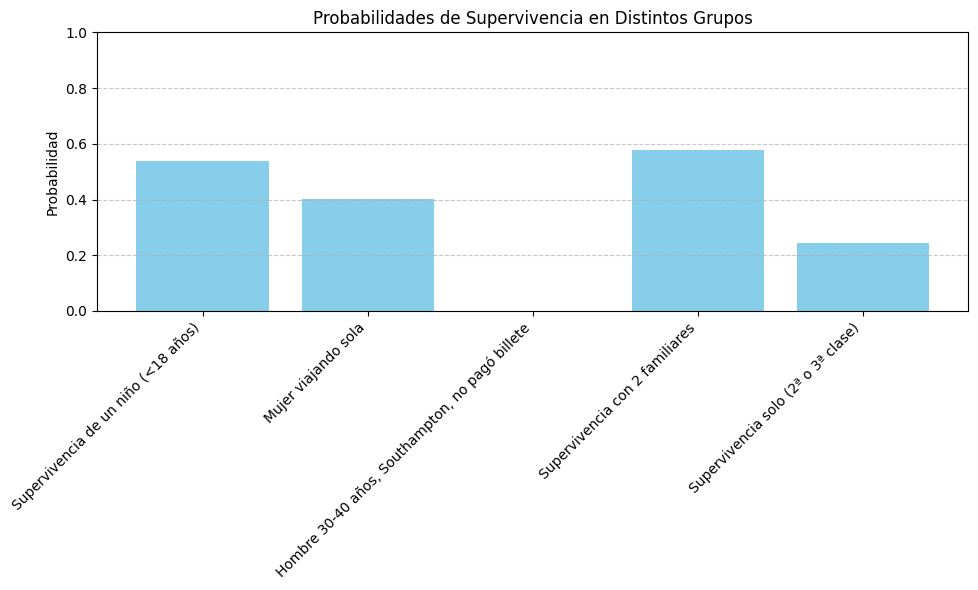

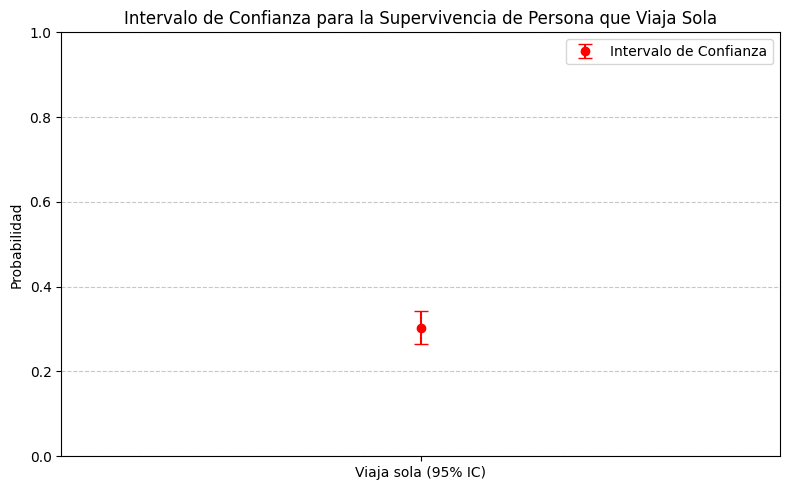

In [5]:
results = {
    "Supervivencia de un niño (<18 años)": prob_survival_children,
    "Mujer viajando sola": prob_women_alone,
    "Hombre 30-40 años, Southampton, no pagó billete": prob_survival_men_30_40_southampton,
    "Supervivencia con 2 familiares": prob_survival_with_2_family,
    "Supervivencia solo (2ª o 3ª clase)": prob_survival_2nd_3rd
}

plt.figure(figsize=(10, 6))
plt.bar(results.keys(), results.values(), color='skyblue')
plt.title("Probabilidades de Supervivencia en Distintos Grupos")
plt.ylabel("Probabilidad")
plt.xticks(rotation=45, ha="right")
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 5))
plt.errorbar(
    ["Viaja sola (95% IC)"], 
    [(lower_bound + upper_bound) / 2], 
    yerr=[(upper_bound - lower_bound) / 2], 
    fmt='o', color='red', capsize=5, label='Intervalo de Confianza'
)
plt.title("Intervalo de Confianza para la Supervivencia de Persona que Viaja Sola")
plt.ylabel("Probabilidad")
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

## #2 Life Satisfaction

Carga el dataset de satifacción vital y contesta a las siguietnes preguntas:

1. Podemos asegurar con cierta confianza estadística (del 99%) que la satisfaccion vital media del mundo es menor de 7.
2. ¿Qué nivel de satisfacción media asignaríamos a país con esperanza de vida de más de 65 años y tasa de empleo superior a 60%? (ojo fijate que son umbrales)
3. ¿Cuál sería la probabilidad de tener más de 6 puntos de satisfacción vital para los países con esperanza de vida mayor a 65 años y tasa de empleo superior a 60%?


Intervalo de confianza para la satisfacción media mundial (99%): (np.float64(6.246375016780705), np.float64(6.95246778700646))
¿La satisfacción media mundial es menor de 7?: True
Satisfacción media para países con esperanza de vida > 65 años y tasa de empleo > 60%: 6.74614501634108
Probabilidad de satisfacción > 6 para países filtrados: 0.78125


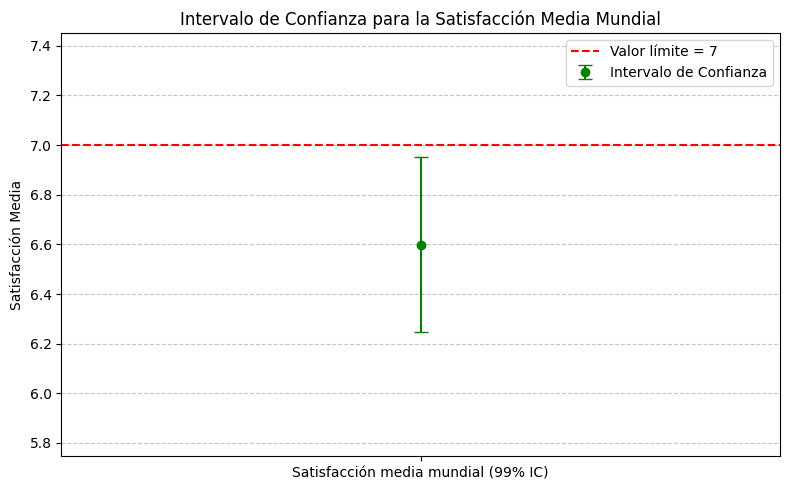

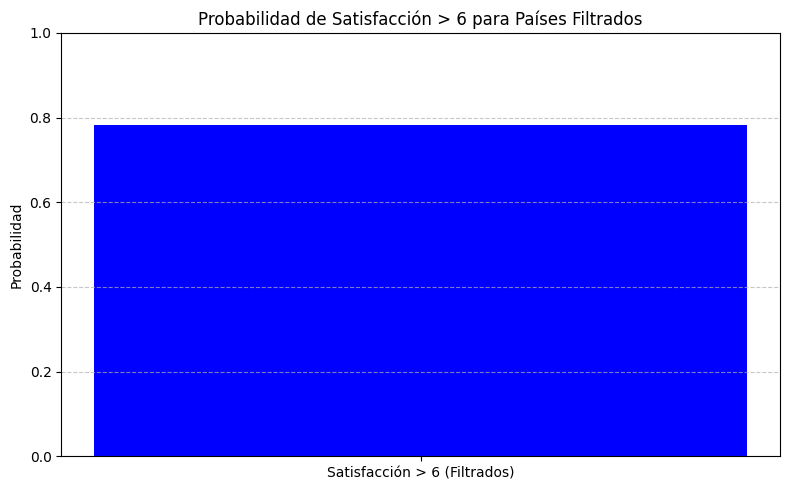

In [6]:
import pandas as pd
from scipy.stats import t

file_path = r'C:\Users\Jesus\Documents\DS_Online_Octubre24_Exercises\DS_Online_Octubre24_Exercises\04_Machine_Learning\Sprint_09\Unidad_01\Practica_Obligatoria\data\lifesat_full.csv'

life_data = pd.read_csv(file_path)

# 1. Comprobar si la satisfacción vital media mundial es menor de 7 con un 99% de confianza
satisfaction_mean = life_data['Life satisfaction'].mean()
satisfaction_std = life_data['Life satisfaction'].std()
n = len(life_data)

# Calcular el intervalo de confianza
confidence = 0.99
t_critical = t.ppf(1 - (1 - confidence) / 2, df=n - 1)
margin_error = t_critical * (satisfaction_std / (n ** 0.5))
lower_bound = satisfaction_mean - margin_error
upper_bound = satisfaction_mean + margin_error

# Verificar si podemos decir con confianza que la satisfacción media es menor de 7
is_less_than_7 = upper_bound < 7

# 2. Nivel de satisfacción media para países con esperanza de vida > 65 años y tasa de empleo > 60%
filtered_countries = life_data[
    (life_data['Life expectancy'] > 65) &
    (life_data['Employment rate'] > 60)
]
satisfaction_mean_filtered = filtered_countries['Life satisfaction'].mean()

# 3. Probabilidad de tener más de 6 puntos de satisfacción vital en los países filtrados
n_filtered = len(filtered_countries)
satisfaction_above_6 = filtered_countries[filtered_countries['Life satisfaction'] > 6]
prob_above_6 = len(satisfaction_above_6) / n_filtered if n_filtered > 0 else 0

results = {
    "Intervalo de confianza para la satisfacción media mundial (99%)": (lower_bound, upper_bound),
    "¿La satisfacción media mundial es menor de 7?": is_less_than_7,
    "Satisfacción media para países con esperanza de vida > 65 años y tasa de empleo > 60%": satisfaction_mean_filtered,
    "Probabilidad de satisfacción > 6 para países filtrados": prob_above_6
}

for key, value in results.items():
    print(f"{key}: {value}")

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.errorbar(
    ["Satisfacción media mundial (99% IC)"], 
    [satisfaction_mean], 
    yerr=[margin_error], 
    fmt='o', color='green', capsize=5, label='Intervalo de Confianza'
)
plt.axhline(y=7, color='red', linestyle='--', label='Valor límite = 7')
plt.title("Intervalo de Confianza para la Satisfacción Media Mundial")
plt.ylabel("Satisfacción Media")
plt.ylim(lower_bound - 0.5, upper_bound + 0.5)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 5))
plt.bar(["Satisfacción > 6 (Filtrados)"], [prob_above_6], color='blue')
plt.title("Probabilidad de Satisfacción > 6 para Países Filtrados")
plt.ylabel("Probabilidad")
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


## EXTRA: La contrainituividad de la probabilidad

Para poder lidiar con la incertidumbre que nos rodea, **solemos aplicar lo que llamamos nuestro "*sentido común*"**. Por ejemplo, si al levantarnos por la mañana vemos que el día se encuentra nublado, este hecho no nos da la **certeza** de que comenzará a llover más tarde; sin embargo, nuestro *sentido común* puede inducirnos a cambiar nuestros planes y a actuar como si *creyéramos* que fuera a llover si las nubes son los suficientemente oscuras o si escuchamos truenos, ya que nuestra experiencia nos dice que estos signos indicarían una mayor *posibilidad* de que el hecho de que fuera a llover más tarde realmente ocurra. 
Nuestro *sentido común* es algo tan arraigado en nuestro pensamiento, que lo utilizamos automáticamente sin siquiera ponernos a pensar en ello; pero muchas veces, el *sentido común* también nos puede jugar una mala pasada y hacernos elegir una respuesta incorrecta.


#### Situación 1 - La coincidencia de cumpleaños
Vamos a una fiesta a la que concurren un total de 50 personas. Allí un amigo nos desafía afirmando que en la fiesta debe haber por lo menos 2 personas que cumplen años el mismo día y nos apuesta 100 euros a que está en lo correcto. Es decir, que si él acierta deberíamos pagarle los 100 euros; o en caso contrario, el nos pagará los 100 euros. ¿Deberíamos aceptar la apuesta? 


#### Situación 2 - ¿Que puerta elegir? (El dilema de Monty Hall)
Estamos participando en un concurso en el cual se nos ofrece la posibilidad de elegir una entre tres puertas. Tras una de ellas se encuentra una ferrari ultimo modelo, y detrás de las otras dos hay una cabra; luego de elegir una puerta, el presentador del concurso abre una de las puertas restantes y muestra que hay una cabra (el presentador sabe que hay detrás de cada puerta). Luego de hacer esto, el presentador nos ofrece la posibilidad de cambiar nuestra elección inicial y quedarnos con la otra puerta que no habíamos elegido inicialmente. ¿Deberíamos cambiar o confiar en nuestra elección inicial?

¿Qué te diría su *sentido común* que deberían hacer en cada una de estas situaciones?